In [272]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.tree import plot_tree

In [273]:
df=pd.DataFrame()
alphas=[]

In [274]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [275]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

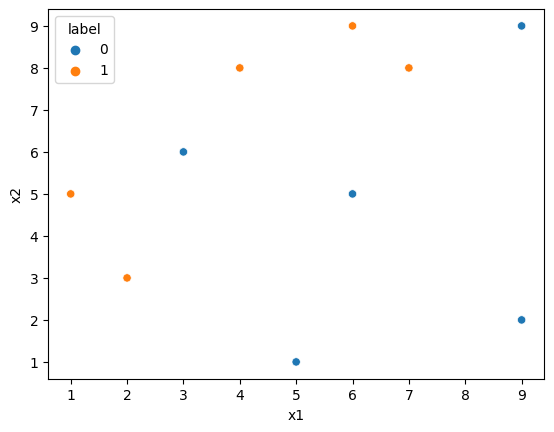

In [276]:
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df["label"])

In [277]:
df['weight']=1/df.shape[0]
df

,x1,x2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [278]:
dt1=DecisionTreeClassifier(max_depth=1)

In [279]:
X=df.iloc[:,0:2].values
Y=df.iloc[:,2].values
dt1.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

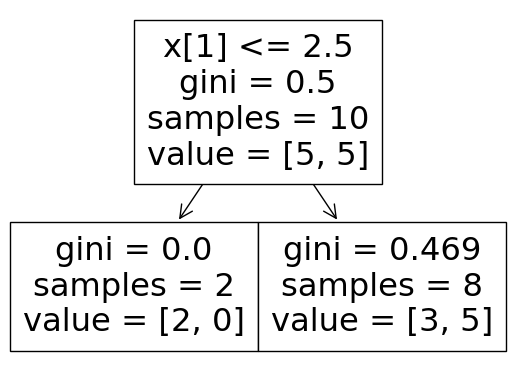

In [280]:
plot_tree(dt1)

<Axes: >

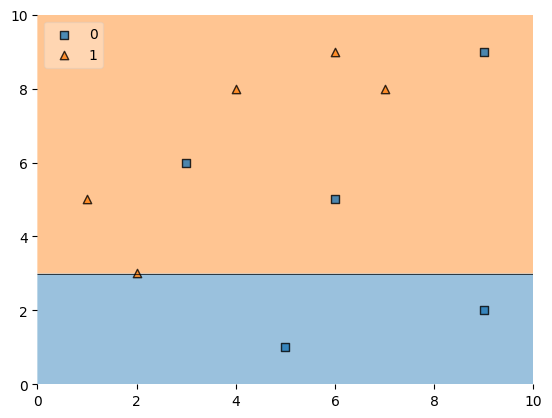

In [281]:
plot_decision_regions(X,Y,clf=dt1,legend=2)

In [282]:
df['y_pred']=dt1.predict(X)
df

,x1,x2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [283]:
# all functions

def calculate_modal_weight(error):
    return 0.5*np.log((1-error)/(error+0.00000001))


def update_row_weight(row,alpha=alpha):
    if row['label']==row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)   


def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['upper_range']>a and row['lower_range']<a:
                indices.append(index)
    return indices   

In [284]:
error=df['weight'].where(df['label']!=df['y_pred']).sum()
alpha=calculate_modal_weight(error)
alphas.append(alpha)

In [285]:
df['update_weight']=df.apply(update_row_weight,axis=1)
df['normalise_weight']=df['update_weight']/df['update_weight'].sum()

In [286]:
df.update_weight.sum(),df.normalise_weight.sum()

(3000.000070000003, 1.0)

In [287]:
# making range
df['upper_range']=np.cumsum(df['normalise_weight'])
df['lower_range']=df['upper_range']-df['normalise_weight']

In [288]:
df

,x1,x2,label,weight,y_pred,update_weight,normalise_weight,upper_range,lower_range
0,1,5,1,0.1,1,0.00001,3.333333e-09,3.333333e-09,0.000000e+00
1,2,3,1,0.1,1,0.00001,3.333333e-09,6.666667e-09,3.333333e-09
2,3,6,0,0.1,1,1000.00000,3.333333e-01,3.333333e-01,6.666666e-09
3,4,8,1,0.1,1,0.00001,3.333333e-09,3.333333e-01,3.333333e-01
4,5,1,0,0.1,0,0.00001,3.333333e-09,3.333333e-01,3.333333e-01
5,6,9,1,0.1,1,0.00001,3.333333e-09,3.333333e-01,3.333333e-01
6,6,5,0,0.1,1,1000.00000,3.333333e-01,6.666667e-01,3.333333e-01
7,7,8,1,0.1,1,0.00001,3.333333e-09,6.666667e-01,6.666667e-01
8,9,9,0,0.1,1,1000.00000,3.333333e-01,1.000000e+00,6.666667e-01
9,9,2,0,0.1,0,0.00001,3.333333e-09,1.000000e+00,1.000000e+00


In [289]:
index=create_new_dataset(df)
df2=df.iloc[index,0:4]
df2.reset_index(inplace=True,drop=True)

In [290]:
dt2=DecisionTreeClassifier()
X=df2.iloc[:,0:2].values
Y=df2.iloc[:,2].values
dt2.fit(X,Y)

DecisionTreeClassifier()

In [291]:
df2['y_pred']=dt2.predict(X)


In [292]:
df2

,x1,x2,label,weight,y_pred
0,3,6,0,0.1,0
1,9,9,0,0.1,0
2,6,5,0,0.1,0
3,9,9,0,0.1,0
4,6,5,0,0.1,0
5,9,9,0,0.1,0
6,9,9,0,0.1,0
7,3,6,0,0.1,0
8,9,9,0,0.1,0
9,9,9,0,0.1,0


In [293]:
error=df2['weight'].where(df2['label']!=df2['y_pred']).sum()
alpha=calculate_modal_weight(error)
alphas.append(alpha)

In [294]:
df2['update_weight']=df2.apply(update_row_weight,axis=1)
df2['normalise_weight']=df2['update_weight']/df2['update_weight'].sum()

In [295]:
# making range
df2['upper_range']=np.cumsum(df2['normalise_weight'])
df2['lower_range']=df2['upper_range']-df2['normalise_weight']
df

,x1,x2,label,weight,y_pred,update_weight,normalise_weight,upper_range,lower_range
0,1,5,1,0.1,1,0.00001,3.333333e-09,3.333333e-09,0.000000e+00
1,2,3,1,0.1,1,0.00001,3.333333e-09,6.666667e-09,3.333333e-09
2,3,6,0,0.1,1,1000.00000,3.333333e-01,3.333333e-01,6.666666e-09
3,4,8,1,0.1,1,0.00001,3.333333e-09,3.333333e-01,3.333333e-01
4,5,1,0,0.1,0,0.00001,3.333333e-09,3.333333e-01,3.333333e-01
5,6,9,1,0.1,1,0.00001,3.333333e-09,3.333333e-01,3.333333e-01
6,6,5,0,0.1,1,1000.00000,3.333333e-01,6.666667e-01,3.333333e-01
7,7,8,1,0.1,1,0.00001,3.333333e-09,6.666667e-01,6.666667e-01
8,9,9,0,0.1,1,1000.00000,3.333333e-01,1.000000e+00,6.666667e-01
9,9,2,0,0.1,0,0.00001,3.333333e-09,1.000000e+00,1.000000e+00


In [296]:
# third dataset
index=create_new_dataset(df2)
df3=df2.iloc[index,0:4]
df3.reset_index(inplace=True,drop=True)

In [297]:
dt3=DecisionTreeClassifier()
X=df3.iloc[:,0:2].values
Y=df3.iloc[:,2].values
dt3.fit(X,Y)

DecisionTreeClassifier()

In [298]:
df3['y_pred']=dt3.predict(X)
df3

,x1,x2,label,weight,y_pred
0,3,6,0,0.1,0
1,9,9,0,0.1,0
2,6,5,0,0.1,0
3,9,9,0,0.1,0
4,9,9,0,0.1,0
5,6,5,0,0.1,0
6,3,6,0,0.1,0
7,9,9,0,0.1,0
8,9,9,0,0.1,0
9,6,5,0,0.1,0


In [299]:
error=df3['weight'].where(df3['label']!=df3['y_pred']).sum()
alpha=calculate_modal_weight(error)
alphas.append(alpha)

In [300]:
df3['update_weight']=df3.apply(update_row_weight,axis=1)
df3['normalise_weight']=df3['update_weight']/df3['update_weight'].sum()

In [301]:
# making range
df3['upper_range']=np.cumsum(df3['normalise_weight'])
df3['lower_range']=df3['upper_range']-df3['normalise_weight']
df

,x1,x2,label,weight,y_pred,update_weight,normalise_weight,upper_range,lower_range
0,1,5,1,0.1,1,0.00001,3.333333e-09,3.333333e-09,0.000000e+00
1,2,3,1,0.1,1,0.00001,3.333333e-09,6.666667e-09,3.333333e-09
2,3,6,0,0.1,1,1000.00000,3.333333e-01,3.333333e-01,6.666666e-09
3,4,8,1,0.1,1,0.00001,3.333333e-09,3.333333e-01,3.333333e-01
4,5,1,0,0.1,0,0.00001,3.333333e-09,3.333333e-01,3.333333e-01
5,6,9,1,0.1,1,0.00001,3.333333e-09,3.333333e-01,3.333333e-01
6,6,5,0,0.1,1,1000.00000,3.333333e-01,6.666667e-01,3.333333e-01
7,7,8,1,0.1,1,0.00001,3.333333e-09,6.666667e-01,6.666667e-01
8,9,9,0,0.1,1,1000.00000,3.333333e-01,1.000000e+00,6.666667e-01
9,9,2,0,0.1,0,0.00001,3.333333e-09,1.000000e+00,1.000000e+00


In [302]:
data=df.iloc[:,0:2]
data

,x1,x2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [303]:
alphas

[0.42364891352693534, 9.210340371976184, 9.210340371976184]

In [304]:
np.sign(alphas[0]*dt1.predict(data)+alphas[1]*dt2.predict(data)+alphas[2]*dt3.predict(data))

c:\Users\saran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\saran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\saran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])